# <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
# This data-set holds housing data, of all the houses listed within san francisco. The data covers a variety of important 
# variables that can be used to assess the value of any given household.

# For the hypothesis test, we will attempt to discover the relationshop between SF homes number of bedrooms and baths,
# and use these varibles to predict the # of square feet for a given household. 


In [2]:

# data modules
import numpy as np
import scipy.stats as stats


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

sns.set_style('whitegrid')



from ipywidgets import *
from IPython.display import display

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sf = '~nvr/desktop/dsi-sf-7-materials-nvr/datasets/sf_assessor_value/assessor_value_cleaned.csv'

df_sf = pd.read_csv(sf)

df_sf.describe()


,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,tax_rate,volume,sqft,stories,year_recorded,year_built,value
count,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,7.541470e+05
mean,1.454369,0.754092,7.865771,49.159869,0.012888,0.897754,5.582982,1000.389953,23.767649,1399.682332,1.149569,2010.479978,1941.020598,4.055065e+05
std,0.632256,1.241474,20.137087,144.199184,0.630595,0.214527,1.405920,2.345064,12.458320,461.872881,0.558494,2.299106,23.594388,3.678854e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,1.000000,495.000000,0.000000,2007.000000,1901.000000,3.002400e+04
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1000.000000,14.000000,1075.000000,1.000000,2008.000000,1924.000000,1.287180e+05
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1000.000000,21.000000,1320.000000,1.000000,2010.000000,1939.000000,3.217570e+05
75%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1000.000000,36.000000,1656.000000,1.000000,2012.000000,1953.000000,5.660385e+05
max,3.000000,4.000000,93.300000,799.000000,50.000000,1.000000,9.000000,1019.000000,44.000000,3050.000000,4.000000,2014.000000,2013.000000,8.755610e+06


In [3]:
df_sf.corr()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,tax_rate,volume,sqft,stories,year_recorded,year_built,value
baths,1.000000,0.397082,-0.000550,0.331175,0.007026,-0.007812,0.510244,0.016116,-0.065313,0.563457,0.195576,0.027148,0.275479,0.263493
beds,0.397082,1.000000,0.142445,0.387833,0.018139,-0.025869,0.223525,0.038930,-0.095238,0.218199,0.056726,0.052881,0.179665,0.251403
lot_depth,-0.000550,0.142445,1.000000,0.096782,0.026965,-0.022108,0.050266,-0.043152,0.019104,0.010443,0.054905,0.000786,-0.065026,0.020428
basement_area,0.331175,0.387833,0.096782,1.000000,0.024298,-0.043188,0.349719,-0.026202,0.014251,0.286173,-0.017591,0.034898,-0.009896,0.083477
front_ft,0.007026,0.018139,0.026965,0.024298,1.000000,-0.001827,0.008144,-0.001269,0.009812,0.010714,0.008772,0.000911,0.003491,0.013344
owner_pct,-0.007812,-0.025869,-0.022108,-0.043188,-0.001827,1.000000,-0.034558,0.002866,-0.054220,-0.001142,0.007593,-0.019072,0.017088,-0.078518
rooms,0.510244,0.223525,0.050266,0.349719,0.008144,-0.034558,1.000000,-0.065859,0.035656,0.774278,0.329158,0.013084,-0.219615,0.151625
tax_rate,0.016116,0.038930,-0.043152,-0.026202,-0.001269,0.002866,-0.065859,1.000000,0.011594,-0.065621,-0.000482,0.000380,0.120028,-0.048584
volume,-0.065313,-0.095238,0.019104,0.014251,0.009812,-0.054220,0.035656,0.011594,1.000000,-0.102540,0.010402,-0.002442,-0.043129,-0.201043
sqft,0.563457,0.218199,0.010443,0.286173,0.010714,-0.001142,0.774278,-0.065621,-0.102540,1.000000,0.396701,0.010982,-0.120566,0.287794


In [4]:
cleaned = df_sf[(df_sf["baths"] != 0)  & (df_sf["beds"]!= 0)]

type(cleaned)

pandas.core.frame.DataFrame

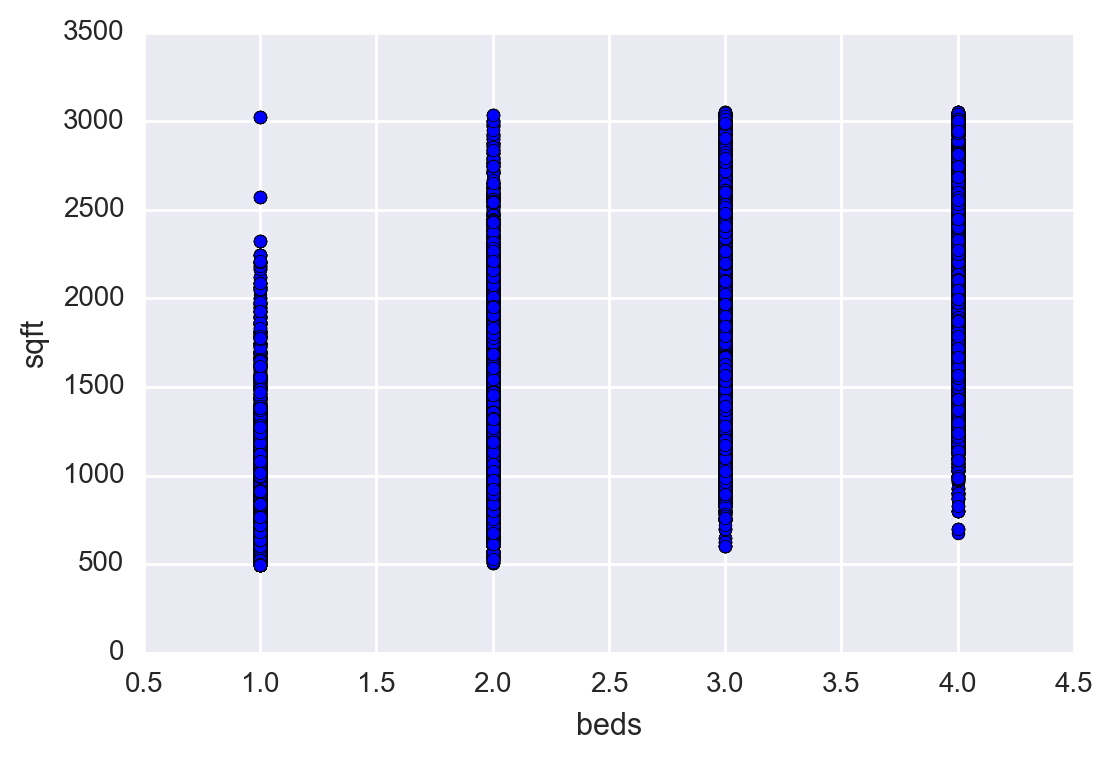

In [5]:

plt.scatter( cleaned["beds"], cleaned['sqft'])

plt.xlabel('beds')
plt.ylabel('sqft')



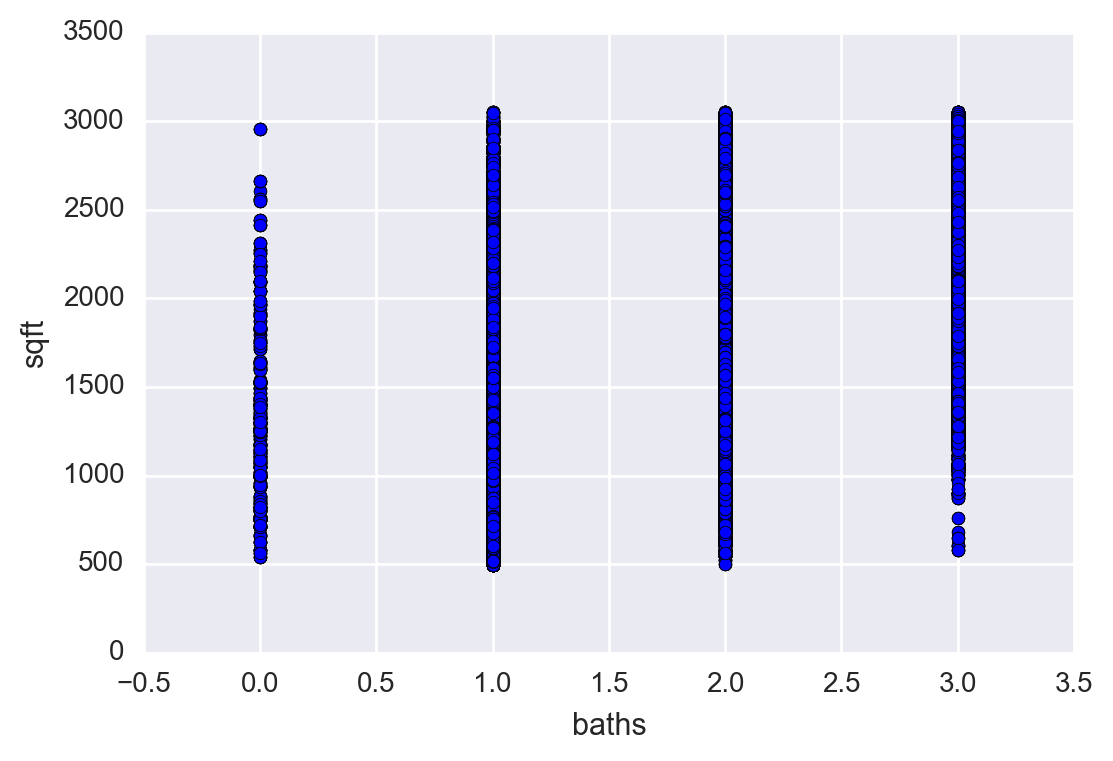

In [6]:

plt.scatter( df_sf["baths"], df_sf['sqft'])

plt.xlabel('baths')
plt.ylabel('sqft')

plt.show()

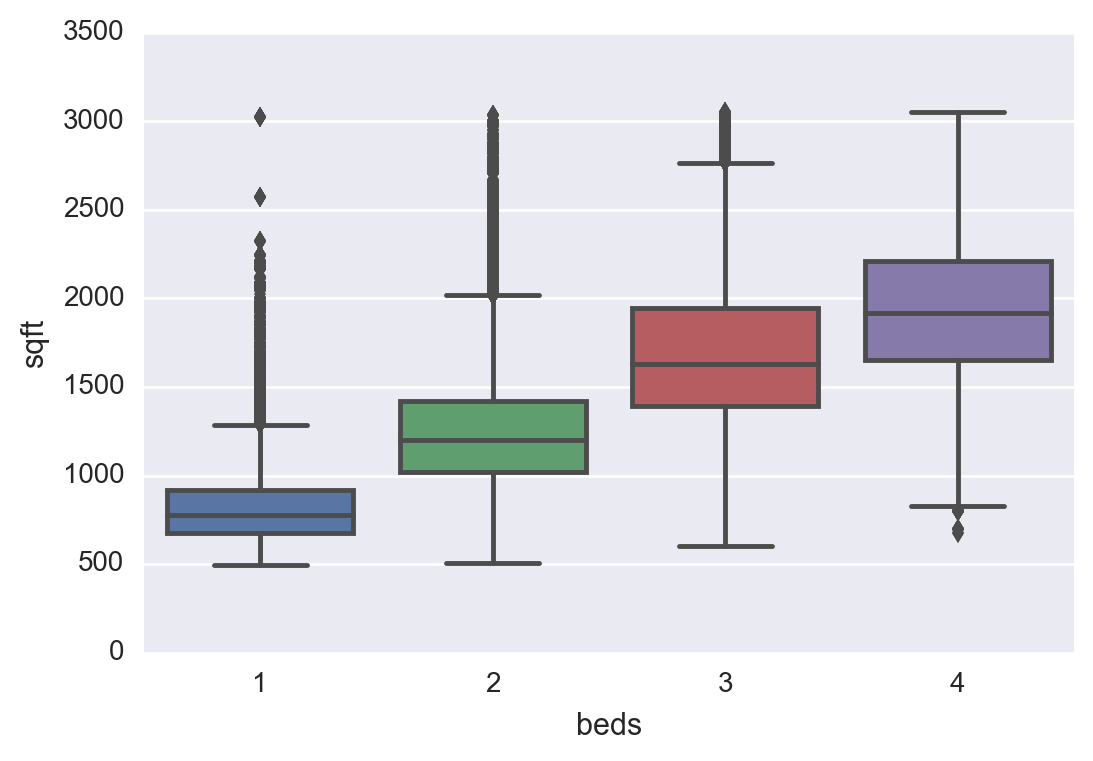

In [7]:

sns.boxplot( cleaned["beds"], cleaned['sqft'])
plt.show()

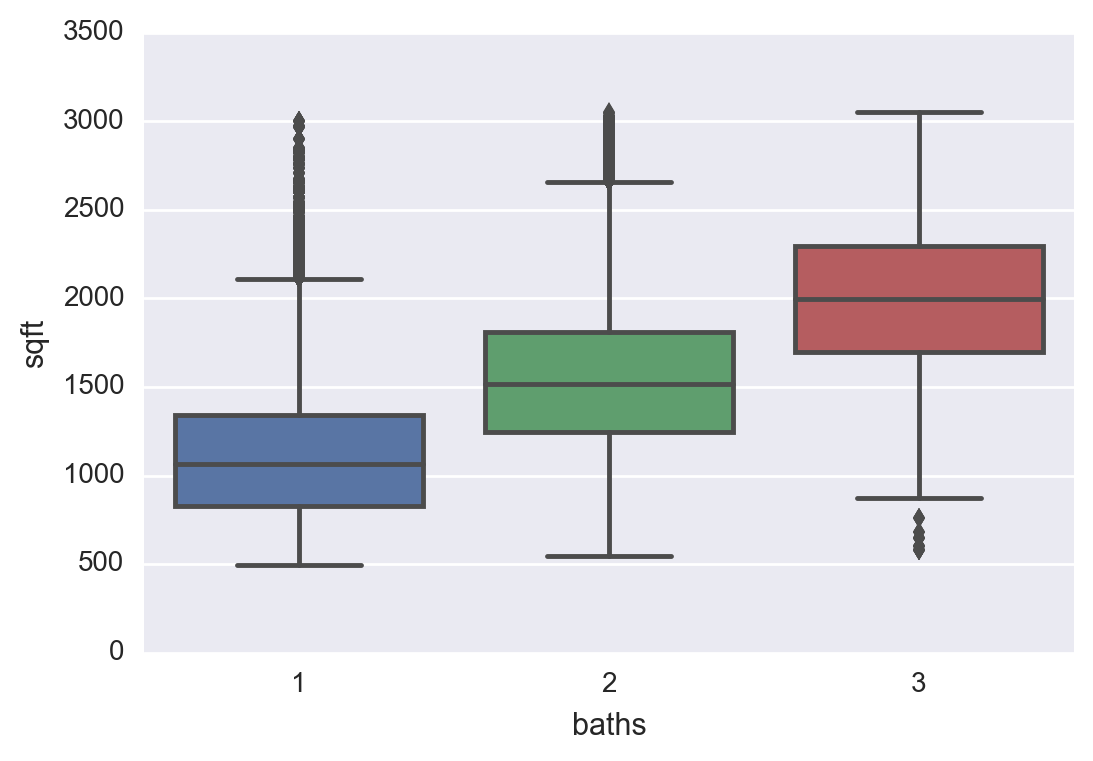

In [8]:

sns.boxplot( cleaned["baths"], cleaned['sqft'])
plt.show()

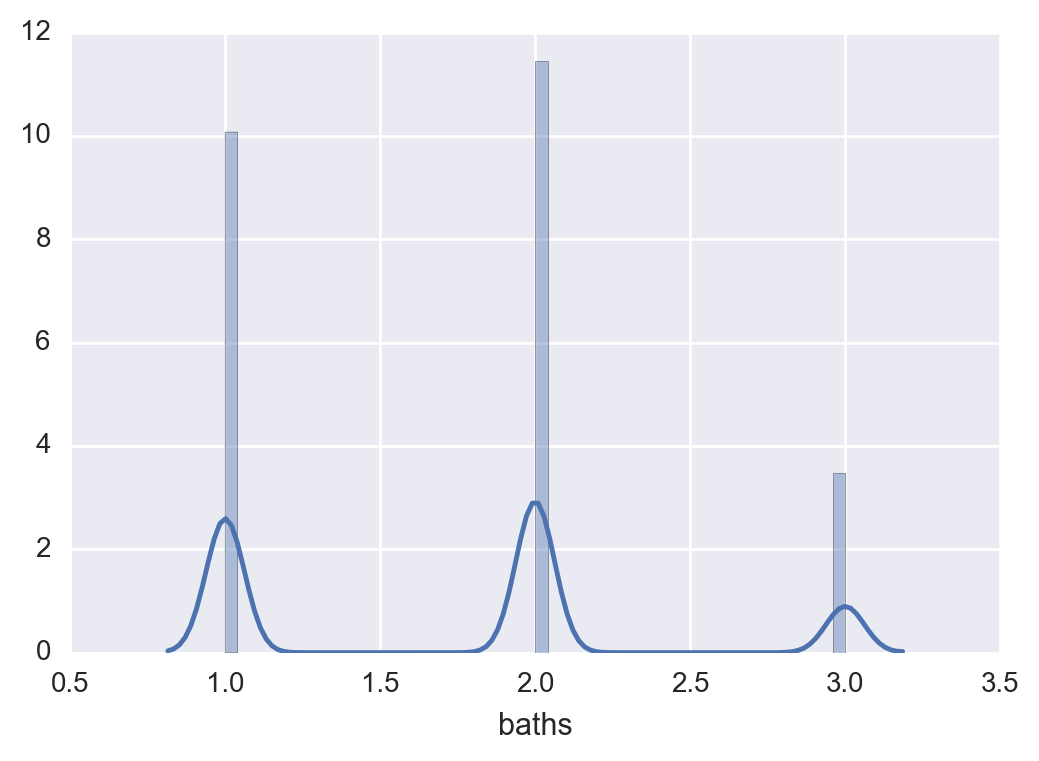

In [9]:

sns.distplot( cleaned["baths"])
plt.show()

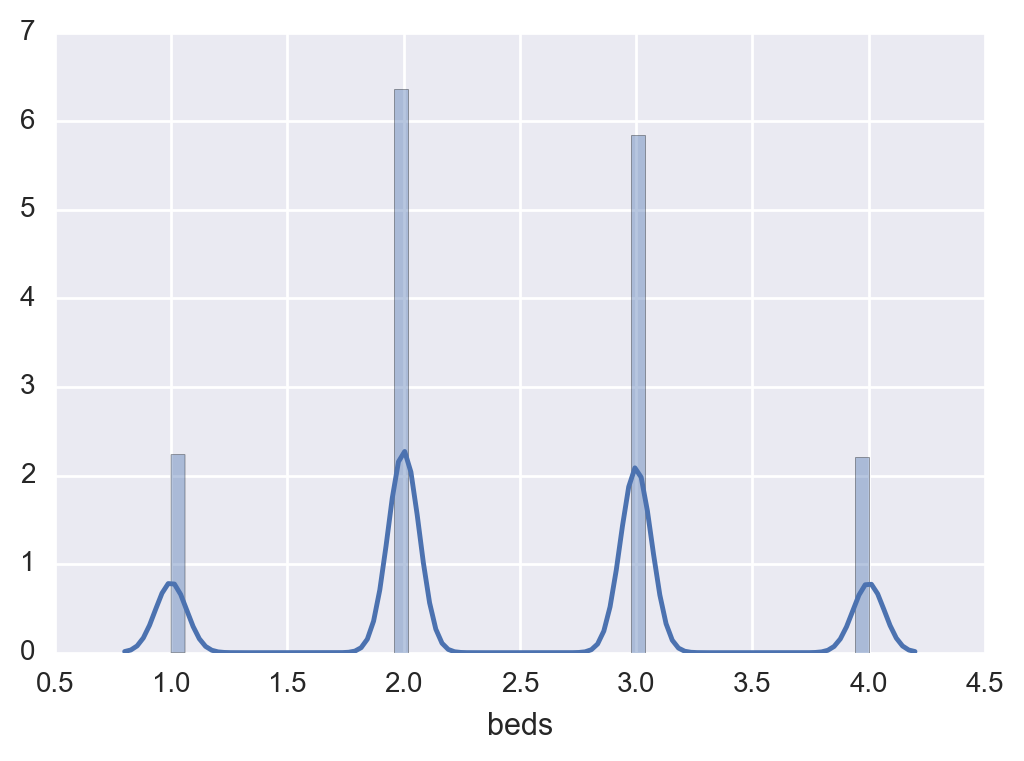

In [10]:
sns.distplot( cleaned["beds"])
plt.show()

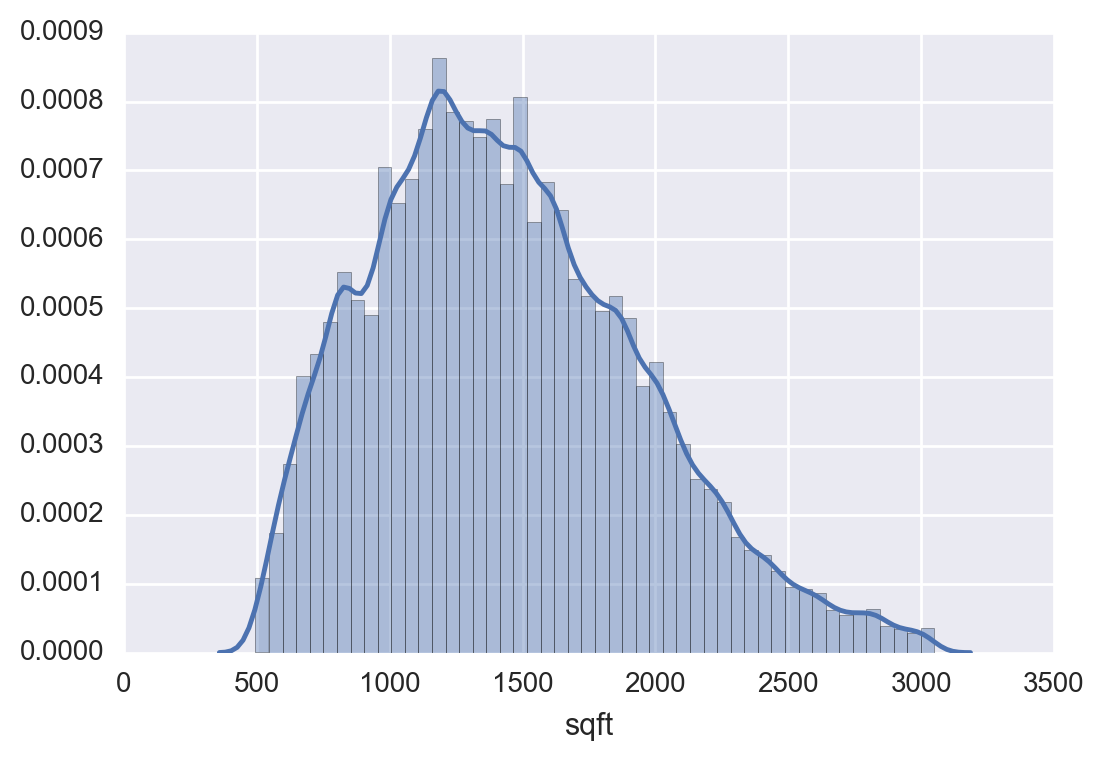

In [11]:
sns.distplot( cleaned["sqft"])
plt.show()

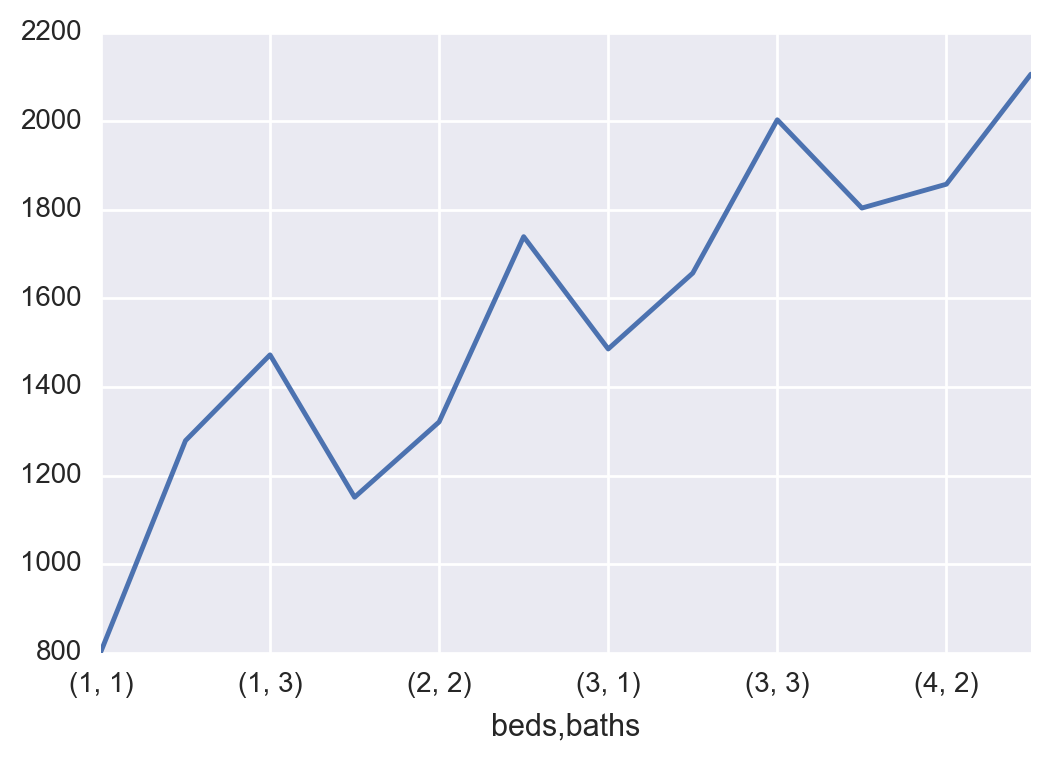

In [12]:
cleaned.groupby(["beds","baths" ])["sqft"].mean().plot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [13]:
# Our predictor variables are Beds and Baths. Our predictor variable is sqft 
print "SQFT Stats"
print cleaned['sqft'].mean()
print cleaned['sqft'].std()
print ""
print "Beds Stats"
print cleaned['beds'].mean()
print cleaned['beds'].std()
print ""
print "Baths Stats"
print cleaned['baths'].mean()
print cleaned['baths'].std()


SQFT Stats
1442.6411314
504.398807742

Beds Stats
2.48236076243
0.885237550532

Baths Stats
1.7360937377
0.687323287548


In [14]:
# Stats/Regresions Packages
# Form the linear regression model 

import sklearn
print sklearn.__version__

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import patsy

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

0.18.1


/Users/NVR/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
Y = cleaned["sqft"]


In [16]:
X = cleaned.iloc[:,1:2].values


In [17]:
ss = StandardScaler()


In [18]:
Xn = ss.fit_transform(X)


/Users/NVR/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [19]:
lr = LinearRegression()



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [29]:
lr.fit(X_train, y_train)
print "Training R2:" ,lr.score(X_train, y_train)

Training R2: 0.467131513528


In [30]:
y_hat = lr.predict(X_test)
y_hat

array([ 1255.82408183,  2034.85726582,  1645.34067382, ...,  1645.34067382,
        1255.82408183,  2034.85726582])

In [31]:
print "Test R2:" ,lr.score(X_test, y_test) 

Test R2: 0.467227200942


In [34]:
r2_test_train_split = metrics.r2_score(y_test, y_hat)

In [23]:
print"R2", r2_test_train_split

R2 0.467227200942


In [38]:
lr_scores = cross_val_score(lr, X, Y, cv=10)

In [39]:
lr_scores.mean()

0.46297899323148178

In [36]:
lr.fit(X, Y)
y_hat = lr.predict(X)


In [414]:
r2_cross_val = metrics.r2_score(Y, y_hat)

In [415]:
print"R2", r2_cross_val

R2 0.467181515185


In [416]:
#2b
# R2 -  R2 only can lie between 0 and 1, in line with accepted percentage values. 


In [423]:
lm = linear_model.LinearRegression()

# Define the target variable, called it y
target = 'sqft'
y = cleaned[target]


# Define your predictors, called them X
X = cleaned[['baths', 'baths']]



Xn = ss.fit_transform(X)
# Print the shapes of your y and X
print y.shape, X.shape


(228638,) (228638, 2)


In [424]:
# Fit your model
model = lm.fit(Xn, y)

# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions
predictions = lm.predict(Xn)
predictions.shape

(228638,)

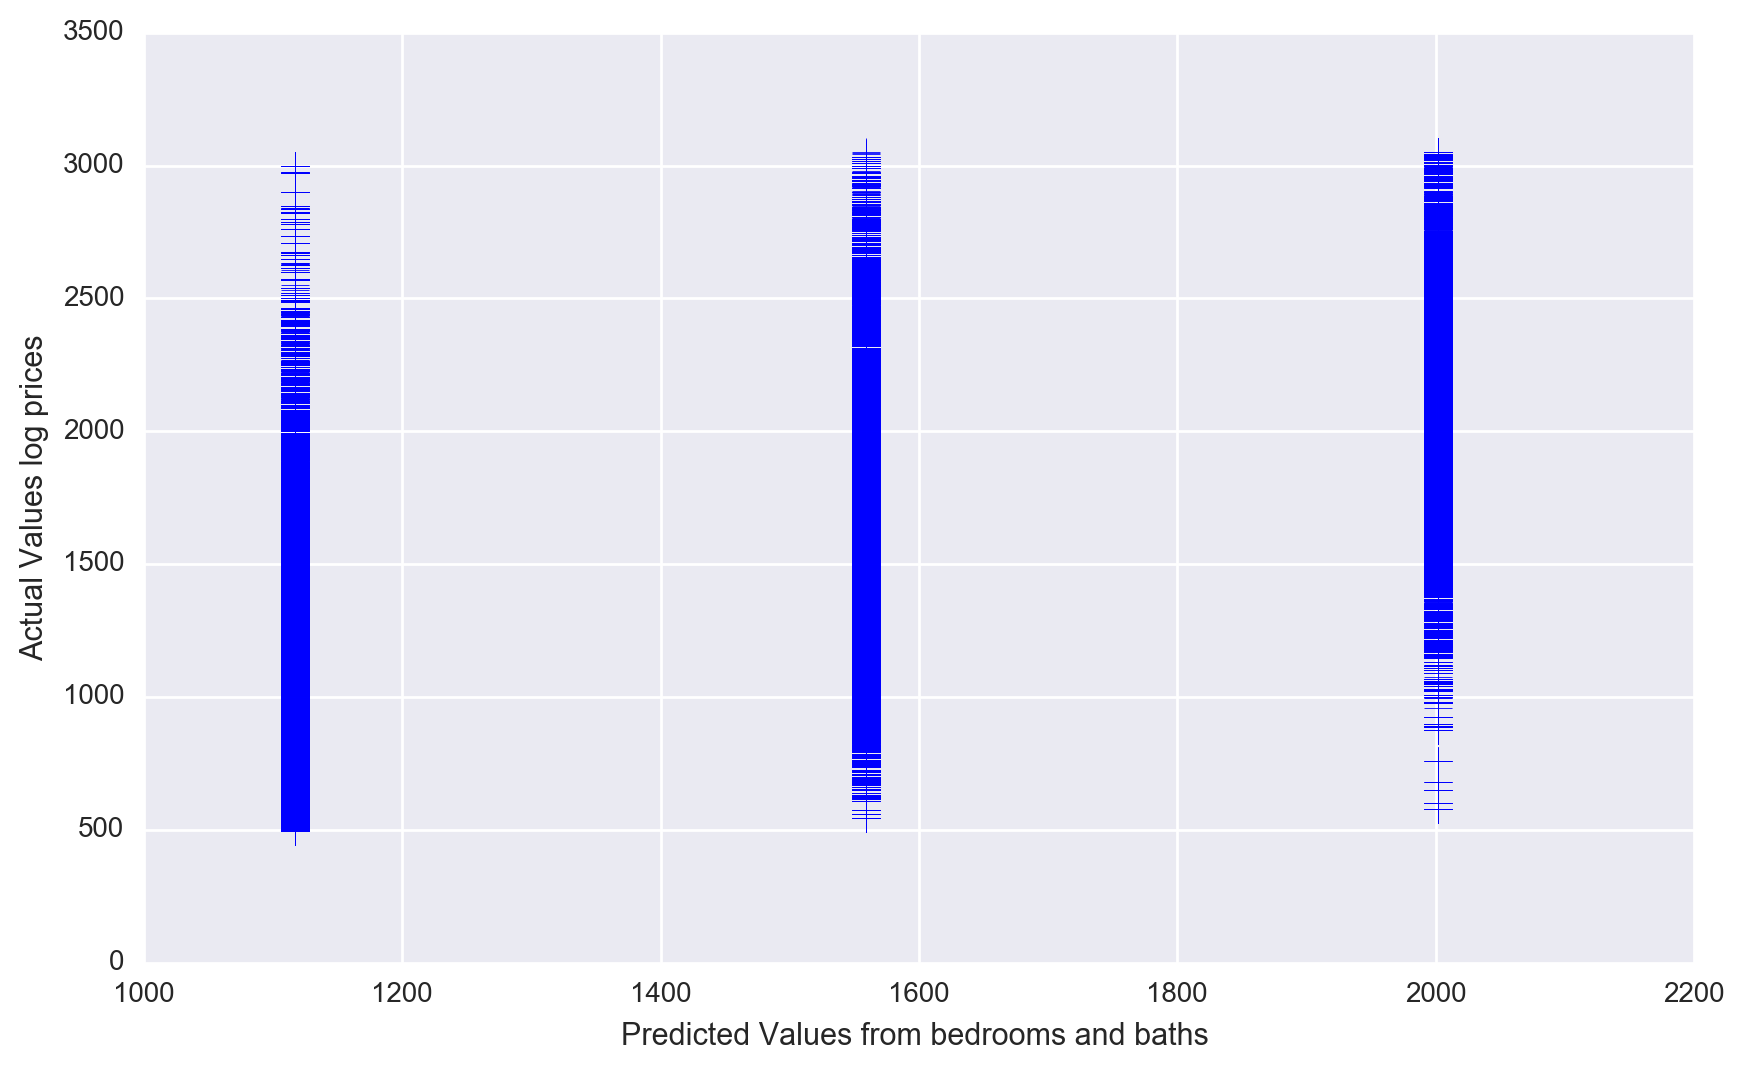

MSE: 161891.426344


In [425]:
## Graph your predicted and y values
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from bedrooms and baths ")
plt.ylabel("Actual Values log prices")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [60]:
fire_incident = pd.read_csv("/Users/NVR/Desktop/dsi-sf-7-materials-nvr/projects/project-3/Fire_Incidents.csv")



In [61]:
fire_incident.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,16000003,0,Precita Av/florida Street,01/01/2016,160010015,01/01/2016 12:02:57 AM,01/01/2016 12:08:05 AM,01/01/2016 12:12:51 AM,San Francisco,94110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Bernal Heights,"(37.7475540000296, -122.409572)"
1,16000004,0,1620 Eucalyptus Drive,01/01/2016,160010018,01/01/2016 12:03:02 AM,01/01/2016 12:09:32 AM,01/01/2016 12:15:04 AM,San Francisco,94132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Sunset/Parkside,"(37.7310980000296, -122.488151)"
2,16000023,0,171 2nd Street,01/01/2016,160010157,01/01/2016 12:35:02 AM,01/01/2016 12:40:17 AM,01/01/2016 12:53:24 AM,San Francisco,94105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,"(37.7871460000297, -122.398598)"
3,16000034,0,535 Wisconsin Street,01/01/2016,160010210,01/01/2016 12:45:36 AM,01/01/2016 12:50:00 AM,01/01/2016 01:00:47 AM,San Francisco,94107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Potrero Hill,"(37.7606670000296, -122.399175)"
4,16000051,0,El Camino Del Mar/seal Rock Drive,01/01/2016,160010302,01/01/2016 01:01:59 AM,01/01/2016 01:12:01 AM,01/01/2016 01:20:16 AM,San Francisco,94121.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Outer Richmond,"(37.7805136379969, -122.510171681643)"


In [71]:
fire_incident['year'] = pd.to_datetime(fire_incident['Incident Date'])

In [72]:
fire_incident['year'] = fire_incident['year'].apply(lambda x:x.year)

In [73]:
fire_incident['month']=pd.to_datetime(fire_incident['Incident Date'])

In [74]:
fire_incident['month'] = fire_incident['month'].apply(lambda x:x.month)

In [75]:
fire_incident['day']=pd.to_datetime(fire_incident['Incident Date'])

In [76]:
fire_incident['day'] = fire_incident['day'].apply(lambda x:x.day)

In [77]:
fire_incident[fire_incident['year']==2016]

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location,year,month,day
0,16000003,0,Precita Av/florida Street,01/01/2016,160010015,01/01/2016 12:02:57 AM,01/01/2016 12:08:05 AM,01/01/2016 12:12:51 AM,San Francisco,94110.0,...,NaN,NaN,NaN,NaN,9.0,Bernal Heights,"(37.7475540000296, -122.409572)",2016,1,1
1,16000004,0,1620 Eucalyptus Drive,01/01/2016,160010018,01/01/2016 12:03:02 AM,01/01/2016 12:09:32 AM,01/01/2016 12:15:04 AM,San Francisco,94132.0,...,NaN,NaN,NaN,NaN,7.0,Sunset/Parkside,"(37.7310980000296, -122.488151)",2016,1,1
2,16000023,0,171 2nd Street,01/01/2016,160010157,01/01/2016 12:35:02 AM,01/01/2016 12:40:17 AM,01/01/2016 12:53:24 AM,San Francisco,94105.0,...,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,"(37.7871460000297, -122.398598)",2016,1,1
3,16000034,0,535 Wisconsin Street,01/01/2016,160010210,01/01/2016 12:45:36 AM,01/01/2016 12:50:00 AM,01/01/2016 01:00:47 AM,San Francisco,94107.0,...,NaN,NaN,NaN,NaN,10.0,Potrero Hill,"(37.7606670000296, -122.399175)",2016,1,1
4,16000051,0,El Camino Del Mar/seal Rock Drive,01/01/2016,160010302,01/01/2016 01:01:59 AM,01/01/2016 01:12:01 AM,01/01/2016 01:20:16 AM,San Francisco,94121.0,...,NaN,NaN,NaN,NaN,1.0,Outer Richmond,"(37.7805136379969, -122.510171681643)",2016,1,1
5,16000053,0,443 Texas Street,01/01/2016,160010319,01/01/2016 01:09:40 AM,01/01/2016 01:15:14 AM,01/01/2016 01:22:36 AM,San Francisco,94107.0,...,NaN,NaN,NaN,NaN,10.0,Potrero Hill,"(37.7608090000296, -122.395301)",2016,1,1
6,16000064,0,1217 Ralston,01/01/2016,160010349,01/01/2016 01:14:00 AM,01/01/2016 01:26:08 AM,01/01/2016 01:40:13 AM,Presidio,94129.0,...,NaN,NaN,NaN,NaN,2.0,Presidio,"(37.8001810000297, -122.473789)",2016,1,1
7,16000071,0,Fell St/laguna Street,01/01/2016,160010383,01/01/2016 01:23:37 AM,01/01/2016 01:27:11 AM,01/01/2016 01:29:19 AM,San Francisco,94102.0,...,NaN,NaN,NaN,NaN,5.0,Hayes Valley,"(37.7755240000297, -122.426071)",2016,1,1
8,16000072,0,California St/larkin Street,01/01/2016,160010384,01/01/2016 01:25:19 AM,01/01/2016 01:25:19 AM,01/01/2016 01:28:57 AM,San Francisco,94109.0,...,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7907880000297, -122.419039)",2016,1,1
9,16000099,0,2415 Van Ness Av 405,01/01/2016,160010499,01/01/2016 01:49:41 AM,01/01/2016 01:55:44 AM,01/01/2016 02:05:33 AM,San Francisco,94123.0,...,NaN,NaN,NaN,NaN,2.0,Russian Hill,"(37.7977870000297, -122.423918)",2016,1,1


In [78]:
pd.DataFrame(fire_incident.groupby(['year','month','day'])[['Incident Number']].size())

0
year month day     
2016 1     1    121
           2     89
           3    137
           4     78
           5     93
           6     92
           7     98
           8     94
           9     68
           10    89
           11    78
           12    68
           13   101
           14    82
           15    92
           16   105
           17    90
           18    83
           19    99
           20    89
           21    75
           22    95
           23    67
           24    86
           25    79
           26    69
           27    80
           28    67
           29    81
           30    75
...             ...
     12    1     90
           2    109
           3     99
           4     76
           5    100
           6     88
           7     80
           8    136
           9     98
           10   133
           11    84
           12    80
           13   102
           14    78
           15   133
           16   107
           17    82
           18    72
           19    95
           20    96
           21    85
           22    82
           23    82
           24    67
           25    65
           26    69
           27    79
           28    99
           29    66
           30    91

[365 rows x 1 columns]

In [80]:
fire_incident.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location,year,month,day
0,16000003,0,Precita Av/florida Street,01/01/2016,160010015,01/01/2016 12:02:57 AM,01/01/2016 12:08:05 AM,01/01/2016 12:12:51 AM,San Francisco,94110.0,...,NaN,NaN,NaN,NaN,9.0,Bernal Heights,"(37.7475540000296, -122.409572)",2016,1,1
1,16000004,0,1620 Eucalyptus Drive,01/01/2016,160010018,01/01/2016 12:03:02 AM,01/01/2016 12:09:32 AM,01/01/2016 12:15:04 AM,San Francisco,94132.0,...,NaN,NaN,NaN,NaN,7.0,Sunset/Parkside,"(37.7310980000296, -122.488151)",2016,1,1
2,16000023,0,171 2nd Street,01/01/2016,160010157,01/01/2016 12:35:02 AM,01/01/2016 12:40:17 AM,01/01/2016 12:53:24 AM,San Francisco,94105.0,...,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,"(37.7871460000297, -122.398598)",2016,1,1
3,16000034,0,535 Wisconsin Street,01/01/2016,160010210,01/01/2016 12:45:36 AM,01/01/2016 12:50:00 AM,01/01/2016 01:00:47 AM,San Francisco,94107.0,...,NaN,NaN,NaN,NaN,10.0,Potrero Hill,"(37.7606670000296, -122.399175)",2016,1,1
4,16000051,0,El Camino Del Mar/seal Rock Drive,01/01/2016,160010302,01/01/2016 01:01:59 AM,01/01/2016 01:12:01 AM,01/01/2016 01:20:16 AM,San Francisco,94121.0,...,NaN,NaN,NaN,NaN,1.0,Outer Richmond,"(37.7805136379969, -122.510171681643)",2016,1,1


In [81]:
fire = pd.DataFrame(fire_incident.groupby(['year','month','day'])[['Incident Number']].size()).reset_index()

In [82]:
police_depart = pd.read_csv("/Users/NVR/Desktop/dsi-sf-7-materials-nvr/projects/project-3/Police_Department_Incidents.csv")

In [65]:
police_depart.columns

Index([u'IncidntNum', u'Category', u'Descript', u'DayOfWeek', u'Date', u'Time',
       u'PdDistrict', u'Resolution', u'Address', u'X', u'Y', u'Location',
       u'PdId'],
      dtype='object')

In [83]:
police_depart['year']=pd.to_datetime(police_depart['Date'])

In [84]:
police_depart['year'] = police_depart['year'].apply(lambda x:x.year)

In [85]:
police_depart['month']=pd.to_datetime(police_depart['Date'])

In [86]:
police_depart['month'] = police_depart['month'].apply(lambda x:x.month)

In [93]:
police_depart['day']=pd.to_datetime(police_depart['Date'])

In [94]:
police_depart['day'] = police_depart['day'].apply(lambda x:x.day)

In [96]:
police = pd.DataFrame(police_depart.groupby(['year','month','day'])[['IncidntNum']].size()).reset_index()

In [97]:
fire

,year,month,day,0
0,2016,1,1,121
1,2016,1,2,89
2,2016,1,3,137
3,2016,1,4,78
4,2016,1,5,93
5,2016,1,6,92
6,2016,1,7,98
7,2016,1,8,94
8,2016,1,9,68
9,2016,1,10,89


In [98]:
police

,year,month,day,0
0,2003,1,1,622
1,2003,1,2,411
2,2003,1,3,440
3,2003,1,4,347
4,2003,1,5,377
5,2003,1,6,400
6,2003,1,7,418
7,2003,1,8,528
8,2003,1,9,417
9,2003,1,10,399


In [109]:
df_combined = pd.merge(left=police,right=fire,on=['year','month','day'])
df_combined.head()

,year,month,day,0_x,0_y
0,2016,1,1,556,121
1,2016,1,2,395,89
2,2016,1,3,316,137
3,2016,1,4,366,78
4,2016,1,5,382,93


In [118]:
# The target is the value
X = df_combined[[x for x in df_combined.columns if x != '0']]
y = df_combined['0_y'].values

In [121]:
# Regularization 

La=LassoCV(alphas=np.logspace(-2, 1, 200))
La.fit(X,y)
La.alpha_

La1=Lasso()
La1.set_params(alpha=La.alpha_)
La1.fit(X,y)
ypred2=La.predict(X)



array([ 120.99801141,   88.99986406,  136.99708509,   78.00050091,
         92.99963248,   91.99969038,   97.99934301,   93.99957459,
         68.00107987,   88.99986406,   78.00050091,   68.00107987,
        100.99916932,   82.00026933,   91.99969038,  104.99893774,
         89.99980617,   83.00021144,   98.99928511,   88.99986406,
         75.0006746 ,   94.99951669,   67.00113776,   86.00003775,
         79.00044302,   69.00102197,   80.00038512,   67.00113776,
         81.00032723,   75.0006746 ,   87.99992196,   79.00044302,
         92.99963248,   92.99963248,   91.99969038,   86.99997986,
         81.00032723,   87.99992196,   88.99986406,   98.99928511,
         94.99951669,   75.0006746 ,   94.99951669,   91.99969038,
         85.00009565,   86.99997986,   87.99992196,   93.99957459,
         77.00055881,   65.00125355,   60.00154303,   60.00154303,
         79.00044302,   85.00009565,   86.99997986,   69.00102197,
         74.00073249,   78.00050091,   70.00096408,   79.00044

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [127]:
park_donations = pd.read_csv('/Users/NVR/Desktop/dsi-sf-7-materials-nvr/projects/project-3/park_donations.csv')
park_scores = pd.read_csv('/Users/NVR/Desktop/dsi-sf-7-materials-nvr/projects/project-3/park_scores.csv')
park_info = pd.read_csv('/Users/NVR/Desktop/dsi-sf-7-materials-nvr/projects/project-3/park_info.csv')

In [128]:
park_donations.head()
park_info.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN


In [113]:
park_scores

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859
5,42,PSA3,Little Hollywood Park,FY05Q4,0.846
6,10,PSA4,Lake Merced Park,FY05Q4,0.730
7,94,GGP,Golden Gate Park,FY05Q4,0.588
8,104,PSA2,Grattan Playground,FY05Q4,0.873
9,153,PSA1,Francisco Park,FY05Q4,1.000


In [129]:
park_scores['Score'].fillna(0,inplace=True)

In [130]:
park_scores.drop(['FQ','Park','PSA'],axis=1,inplace=True)

In [117]:
park_scores.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 2 columns):
ParkID    5495 non-null int64
Score     5495 non-null float64
dtypes: float64(1), int64(1)
memory usage: 85.9 KB


In [132]:
park_info.drop(['Location 1','Lat','email','Number','SupDist','PSAManager','ParkName'],axis=1,inplace=True)

In [134]:
park_info.drop(0,inplace=True)

In [135]:
park_info.head()

,ParkType,ParkServiceArea,Zipcode,Acreage,ParkID
1,Mini Park,PSA 1,94118.0,0.66,156.0
2,Mini Park,PSA 4,94122.0,0.26,185.0
3,Mini Park,PSA 6,94110.0,0.12,51.0
4,Neighborhood Park or Playground,PSA 5,94131.0,0.82,194.0
5,Neighborhood Park or Playground,PSA 3,94124.0,2.74,46.0


In [136]:
park_info = pd.get_dummies(data=park_info,columns=park_info[['ParkType','ParkServiceArea','Zipcode']])

In [137]:
park_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 1 to 229
Data columns (total 45 columns):
Acreage                                     229 non-null float64
ParkID                                      229 non-null float64
ParkType_Civic Plaza or Square              229 non-null float64
ParkType_Community Garden                   229 non-null float64
ParkType_Concession                         229 non-null float64
ParkType_Family Camp                        229 non-null float64
ParkType_Mini Park                          229 non-null float64
ParkType_Neighborhood Park or Playground    229 non-null float64
ParkType_Parkway                            229 non-null float64
ParkType_Regional Park                      229 non-null float64
ParkType_Zoological Garden                  229 non-null float64
ParkServiceArea_Candlestick Park Stadium    229 non-null float64
ParkServiceArea_Golden Gate Park            229 non-null float64
ParkServiceArea_Outside SF                  229 no

In [138]:
df = pd.merge(left=park_info,right=park_scores,on=['ParkID'])

In [139]:
X = df[[x for x in df.columns if x != 'Score']]
y = df[['Score']]

In [140]:
#y.shape
X.shape

(5483, 45)

In [141]:
#Construct Model

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train_test_split = reg.predict(X_test)

In [143]:
r2_train_test_split = metrics.r2_score(y_test,y_pred_train_test_split)
print "r2 of the train_test_split model is {}".format(r2_train_test_split)

r2 of the train_test_split model is 0.0575273016298


In [144]:
from sklearn.linear_model import RidgeCV
# Regularization Ridge
Ri=RidgeCV(alphas = np.logspace(0, 5, 200))
Ri.fit(X,y)
Ri.alpha_


3.5707859649004634

In [145]:
Rigood=Ridge()
Rigood.set_params(alpha=3.5707859649004634)
Rigood.fit(X,y)
ypred_ridge=Rigood.predict(X)

In [146]:
r2_ridge = metrics.r2_score(y,ypred_ridge)
print "r2 of the train_test_split model is {}".format(r2_ridge)

r2 of the train_test_split model is 0.0825899633657


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


In [ ]:
#Each new user is not a organic sign up, and is being prompted by the monetary incentives of another customer. 

# You could measure the success of the app in two ways: 
#1) The number of refferal sign ups that result in an order placed
#2) The total number of referrals that resulted in a new account per user 

#3) Do you believe that there is a need for stricter laws on dangerous weapons? 




<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [387]:

df = pd.read_table('~nvr/desktop/dsi-sf-7-materials-nvr/projects/project-3/chol.txt', 
                       delim_whitespace=True)

In [388]:
df.describe()

,AGE,HEIGHT,WEIGHT,CHOL
count,200.000000,200.00000,200.000000,200.000000
mean,35.715000,172.35000,75.885000,233.600000
std,9.604426,6.77399,10.442076,44.766732
min,18.000000,156.00000,53.000000,107.000000
25%,28.750000,168.00000,68.750000,204.000000
50%,37.000000,172.00000,75.000000,232.000000
75%,42.000000,176.00000,82.000000,259.000000
max,58.000000,191.00000,110.000000,455.000000


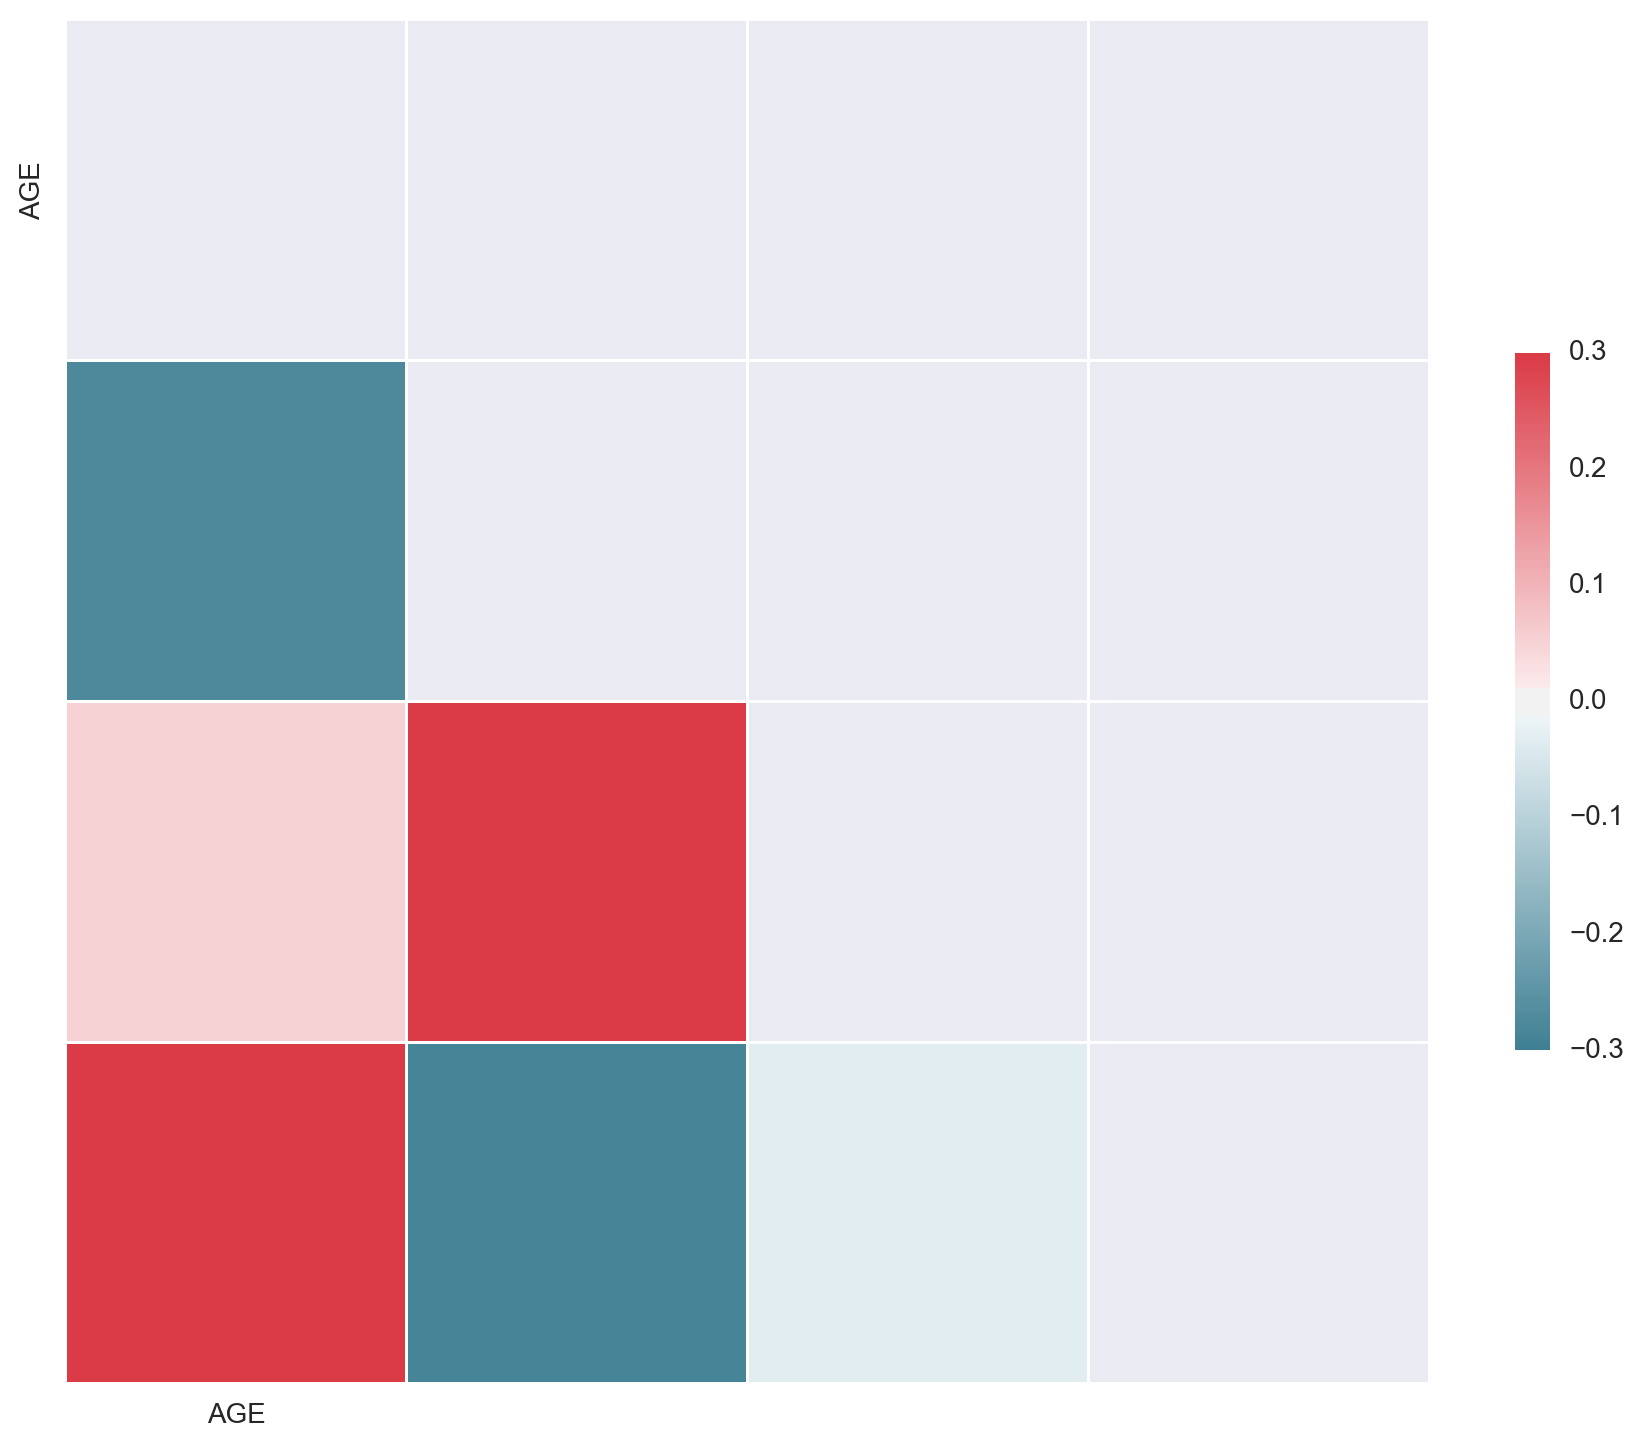

In [389]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [344]:
df.MORT.replace(('alive', 'dead'), (1, 0), inplace=True)

In [350]:
del df["BLOOD"]

In [351]:
df.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,MORT
0,20,176,77,195,nonsmo,1
1,53,167,56,250,sigare,0
2,44,170,80,304,sigare,0
3,37,173,89,178,nonsmo,1
4,26,170,71,206,sigare,1


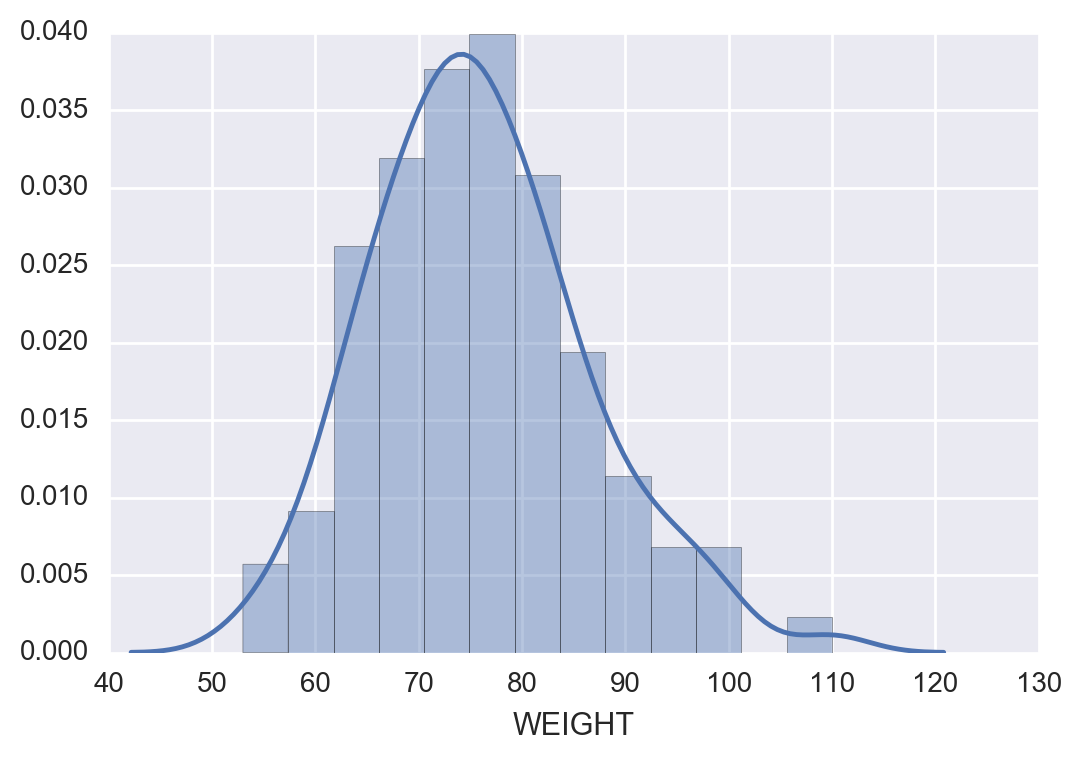

In [362]:
sns.distplot( df["WEIGHT"])
plt.show()

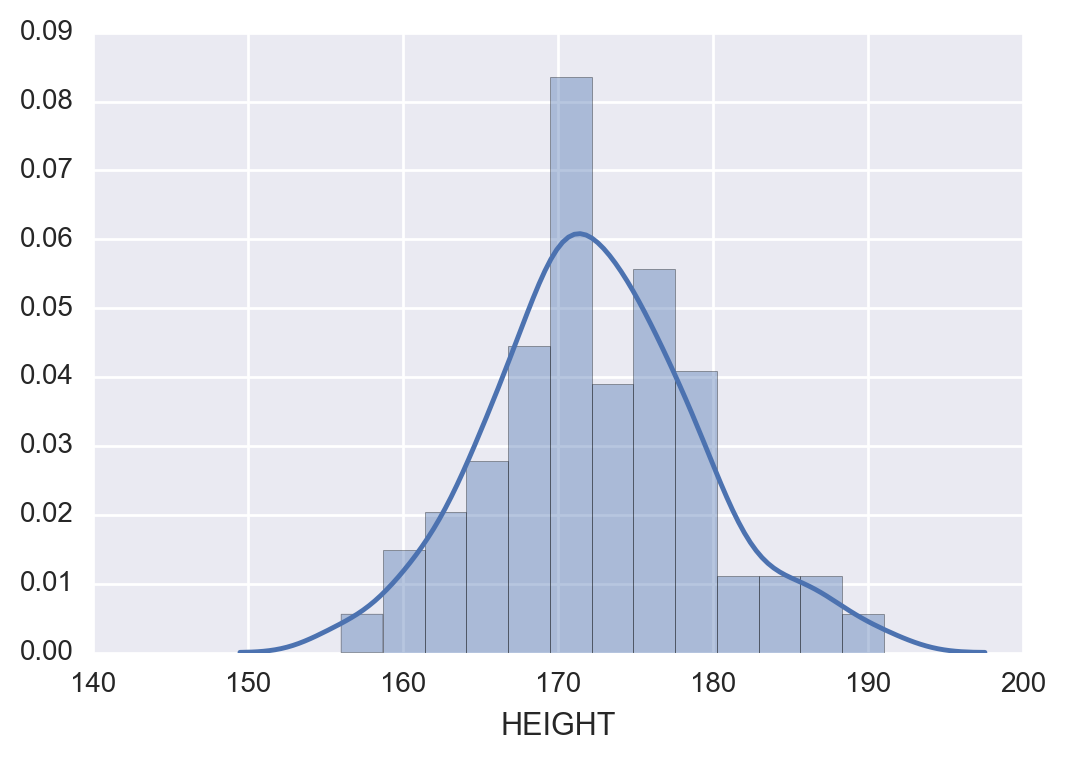

In [363]:
sns.distplot( df["HEIGHT"])
plt.show()

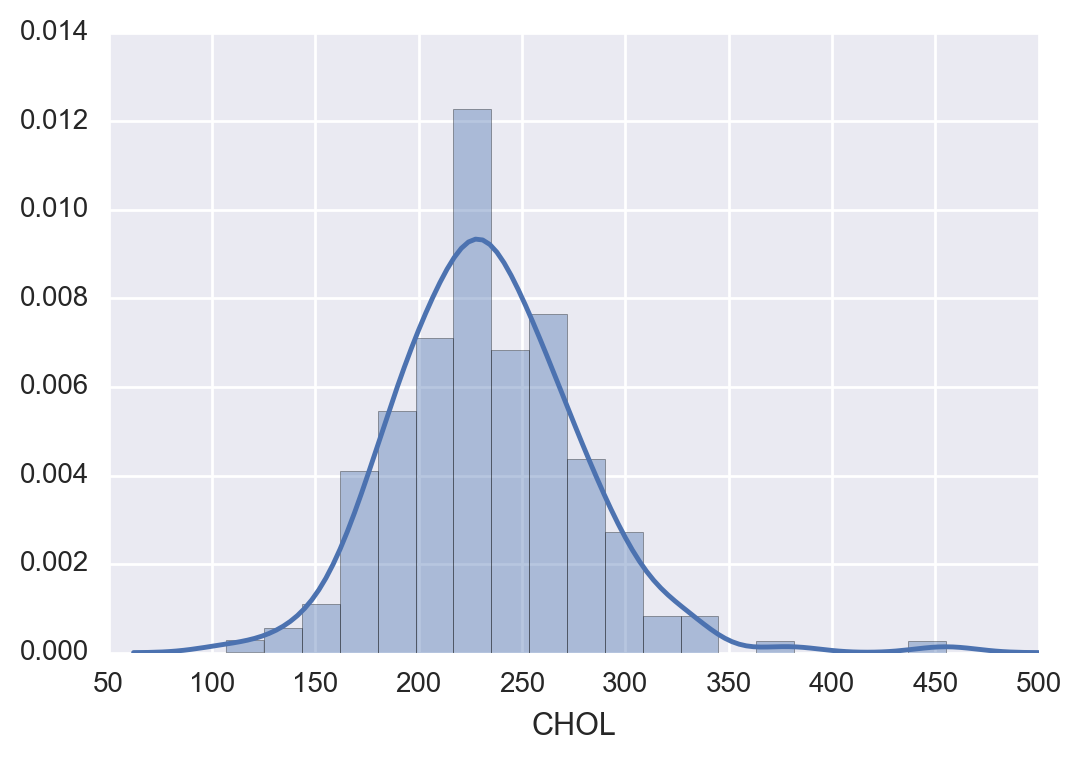

In [364]:
sns.distplot( df["CHOL"])
plt.show()

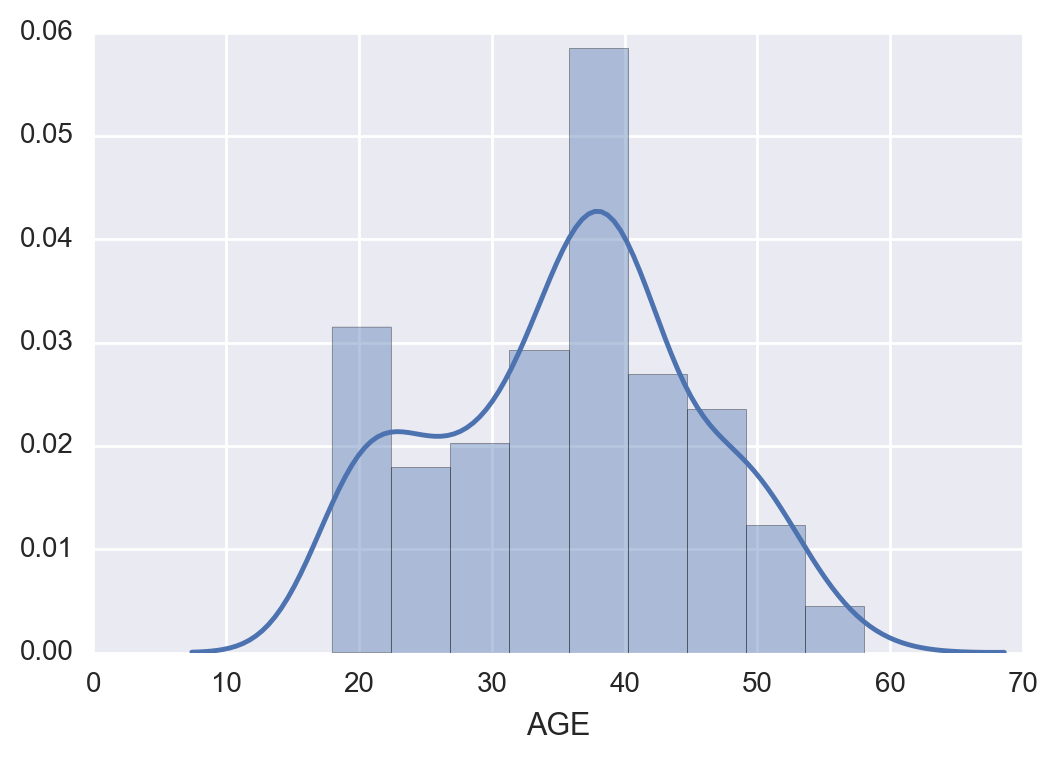

In [367]:
sns.distplot( df["AGE"])
plt.show()

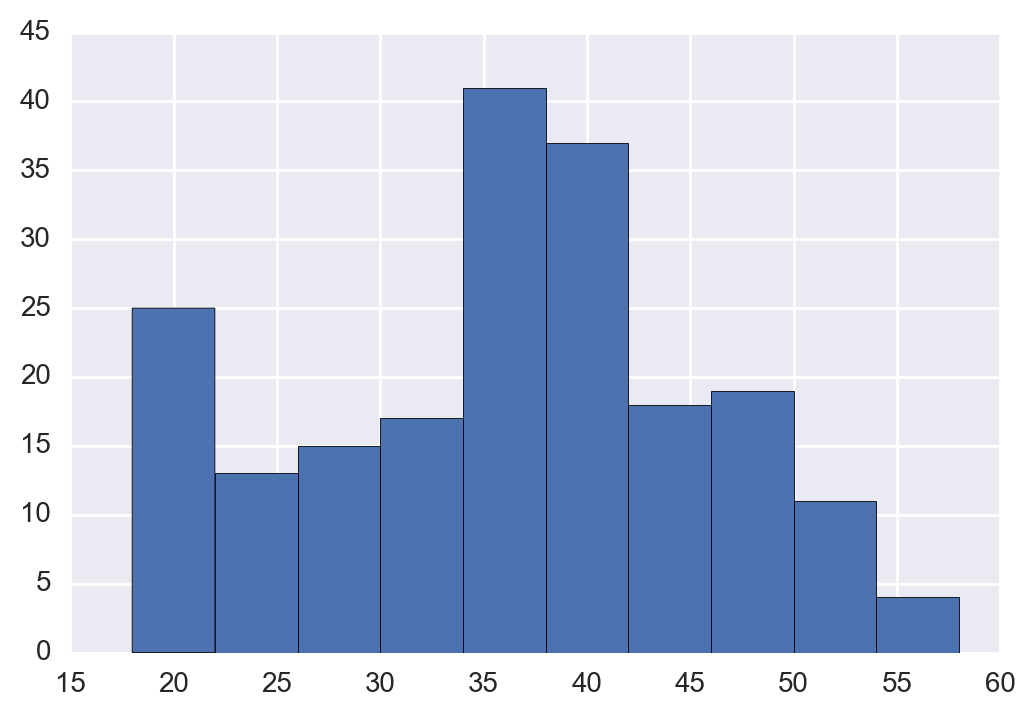

In [371]:
plt.hist(df["AGE"])
plt.show()

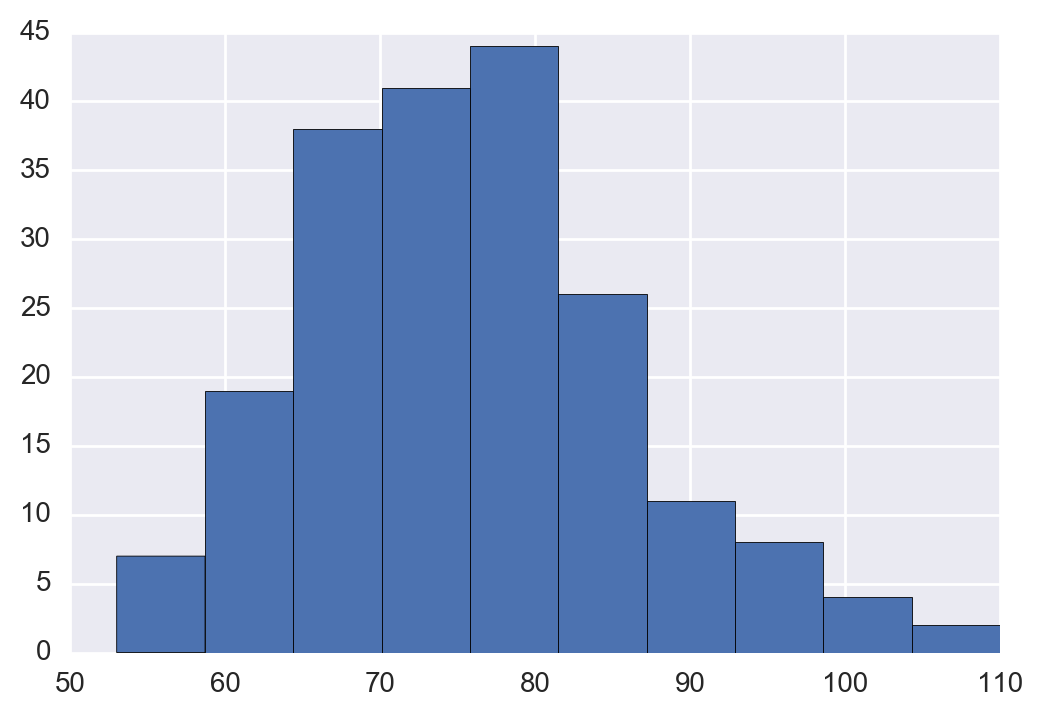

In [373]:
plt.hist(df["WEIGHT"])
plt.show()


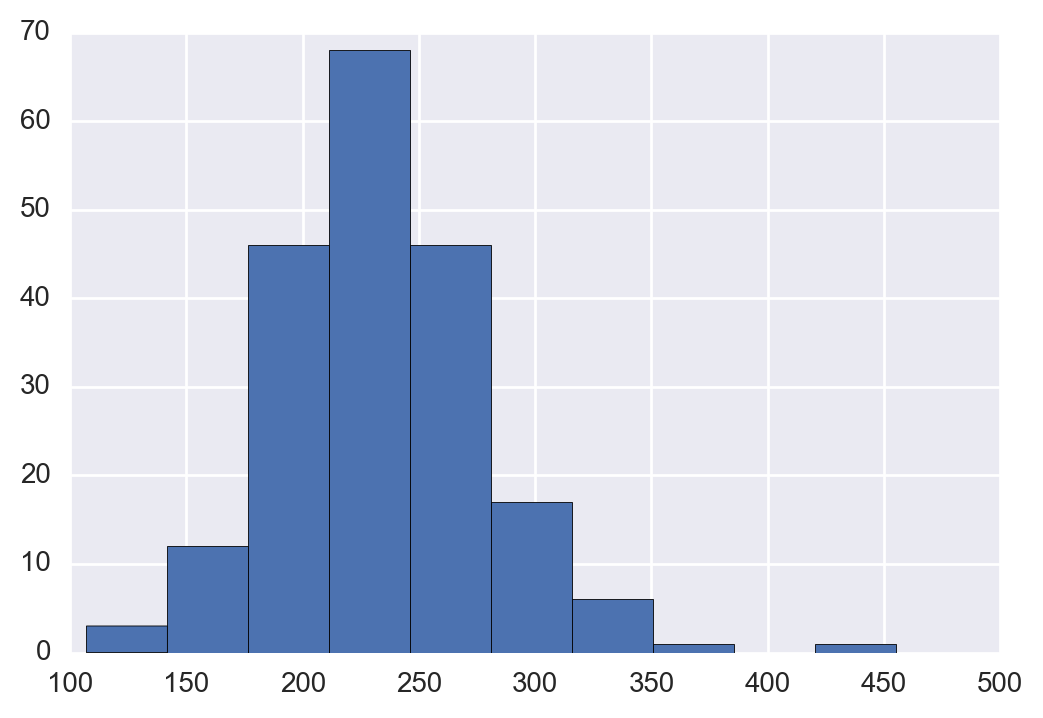

In [376]:
plt.hist(df["CHOL"])
plt.show()


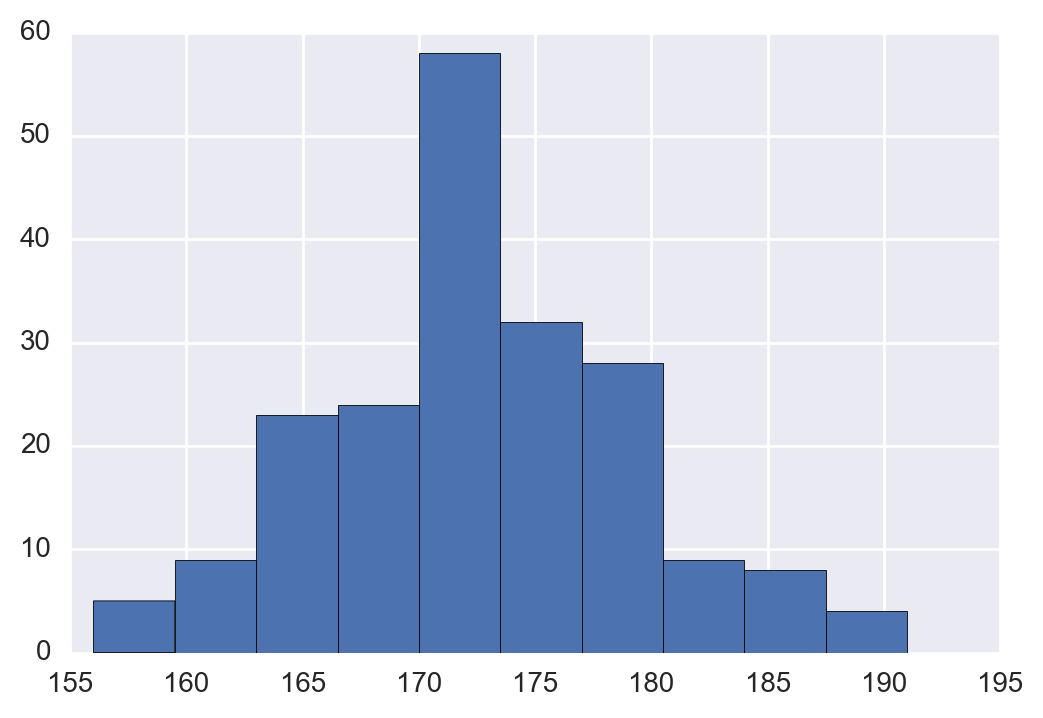

In [377]:
plt.hist(df["HEIGHT"])
plt.show()

In [386]:
print "The dataset mean is: ", df.WEIGHT.mean()
print "The offset of the two means are: " ,85-df.WEIGHT.mean()

The dataset mean is:  75.885
The offset of the two means are:  9.115
